In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [91]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')


In [61]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broccoli',
 'broccoli rabe',
 'broil

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

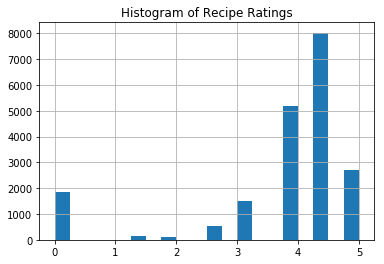

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [78]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

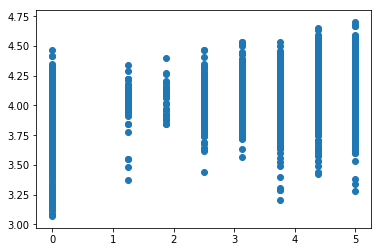

In [5]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [6]:
svr.score(X, Y)

-0.003978314483867873

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

In [92]:
#transform into binary classification: above/below average rating
from sklearn.svm import SVC

raw_data['rating'] = raw_data['rating'].apply(lambda x: 1 if x > raw_data.rating.mean() else 0)

#run svc for baseline comparison
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)


array([0.78820598, 0.78820598, 0.78886118, 0.78886118, 0.78868552])

In [97]:
#eliminate features that only appear once
drop_list = []
for col in raw_data.columns:
    if raw_data[col].sum() == 1: drop_list.append(col)

raw_data.drop(drop_list, axis=1, inplace=True)

In [94]:
#Run svc before feature selection
svc = SVC()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)


array([0.78820598, 0.78820598, 0.78886118, 0.78886118, 0.78868552])

Eliminating the 45 features that only appeared once had no impact on the model's performance. 

In [86]:
#select 30 best features
from sklearn.feature_selection import f_classif, SelectKBest

selector=SelectKBest(score_func=f_classif,k=30)
selector.fit(X,Y)

#Print the 30 chosen features
for index in selector.get_support(True):
    print(X.iloc[0,[index]])

selected index: [  2   7  30  47  54  62  87 105 126 127 152 169 175 190 218 242 256 306
 374 389 419 435 484 490 497 508 536 542 581 584]
3-ingredient recipes    0.0
Name: 235, dtype: float64
alcoholic    0.0
Name: 235, dtype: float64
bake    0.0
Name: 235, dtype: float64
bitters    0.0
Name: 235, dtype: float64
bon appétit    1.0
Name: 235, dtype: float64
breadcrumbs    0.0
Name: 235, dtype: float64
campari    0.0
Name: 235, dtype: float64
cheese    0.0
Name: 235, dtype: float64
cocktail    0.0
Name: 235, dtype: float64
cocktail party    0.0
Name: 235, dtype: float64
créme de cacao    0.0
Name: 235, dtype: float64
dinner    0.0
Name: 235, dtype: float64
drink    0.0
Name: 235, dtype: float64
fall    0.0
Name: 235, dtype: float64
gin    0.0
Name: 235, dtype: float64
harpercollins    0.0
Name: 235, dtype: float64
house & garden    0.0
Name: 235, dtype: float64
liqueur    0.0
Name: 235, dtype: float64
non-alcoholic    0.0
Name: 235, dtype: float64
onion    0.0
Name: 235, dtype: float64


/Users/robgleich/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  5 125 139 140 156 188 210 245 257 258 261 266 270 277 308 310 321 323
 343 355 358 367 371 387 395 427 445 455 470 500 505 538 547 553 573 598
 624 625] are constant.
  UserWarning)
/Users/robgleich/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [89]:
#evaluate 30 best features
X = X.iloc[:,selector.get_support(True)]
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)


array([0.80481728, 0.79734219, 0.79717373, 0.79467997, 0.79866889])

Selecting the 30 best features using SelectKBest only increased the model's accuracy by 1%. Next I'll try removing the nulls and including dietary information.

In [109]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')
raw_data['rating'] = raw_data['rating'].apply(lambda x: 1 if x > raw_data.rating.mean() else 0)

#print(raw_data.columns)
diet_df = raw_data[['rating', 'title', 'calories', 'protein', 'fat', 'sodium']].dropna()


In [110]:
print(diet_df.columns)

Index(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], dtype='object')


In [111]:
X = diet_df.drop(['rating', 'title'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = diet_df.rating.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)
cross_val_score(svc, X, Y, cv=5)


array([0.85624344, 0.8539916 , 0.85189076, 0.86225026, 0.85278654])

Using dietary information instead of ingredients yielded significantly better results. As stated in the assignment, this is a departure from the original task, but it' interesting to note that diet information is a better predictor of recipe rating than ingredients. 